<a href="https://colab.research.google.com/github/KonstantinSV/Bagging-and-random-forest/blob/main/Decision_Bagging_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import model_selection, datasets, metrics, tree, ensemble
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [ ]:
 digits = datasets.load_digits()
 X = digits.data
 y = digits.target

In [ ]:
# классификатор из одного дерева
clf = tree.DecisionTreeClassifier()

In [ ]:
# измерьте качество его работы с помощью cross_val_score
scores = model_selection.cross_val_score(clf, X, y, cv = 10)
scores.mean()

0.8269025450031038

Обучить бэггинг над DecisionTreeClassifier.

In [ ]:
# обучение проходит на части объектов (признаков) по алгоритму бэггинга (BaggingClassifier). Ансамбль классификаторов из 100 деревьев
ans_clf = ensemble.BaggingClassifier(n_estimators=100)

In [ ]:
scores = model_selection.cross_val_score(ans_clf, X, y, cv = 10)
scores.mean()

0.9270639354438238

Обучить каждый базовый алгоритм не на всех d признаках, а на  sqrt 
d случайных признаков. 

In [ ]:
# sqrt d случайных признаков
number_of_features = int(sqrt(X.shape[1]))

In [ ]:
ans_clf_2 = ensemble.BaggingClassifier(max_features = number_of_features, n_estimators=100)

In [ ]:
scores = model_selection.cross_val_score(ans_clf_2, X, y, cv = 10)
scores.mean()

0.9287771570453135

Выбрать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. 

In [ ]:
# одно дерево tree.DecisionTreeClassifier в ансамбле деревьев ensemble.BaggingClassifier
ans_clf_3 = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features = number_of_features), n_estimators = 100)

In [ ]:
scores = model_selection.cross_val_score(ans_clf_3, X, y, cv = 10)
scores.mean()

0.9493575418994412

То же самое что и ensemble.BaggingClassifier(tree.DecisionTreeClassifier()) но одной функцией RandomForestClassifier()

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=100, max_features = number_of_features)

In [ ]:
scores = model_selection.cross_val_score(rf, X, y, cv = 10)
scores.mean()

0.9460024829298572

Графики зависимости качества от значений параметров

Зависимость от количества деревьев

In [ ]:
# sqrt d случайных признаков
number_of_features = int(sqrt(X.shape[1]))

In [ ]:
number_of_estimators = np.arange(5, 150, 5) # количество деревьев
scores_estimators = [] # средние оценки моделей, на каждом количестве деревьев
for n in number_of_estimators:
    clf = ensemble.RandomForestClassifier(n_estimators = n, max_features = number_of_features) # n_estimators - кол-во деревьев. max_features - количество признаков
    scores_estimators.append(model_selection.cross_val_score(clf, X, y, cv = 10).mean()) # обучение и оценка по методу крос валидации с разбиением на 10 фолдов. Ответ берется средний по 10 ответам на каждом разбиении

Text(0.5, 1.0, 'RandomForest score')

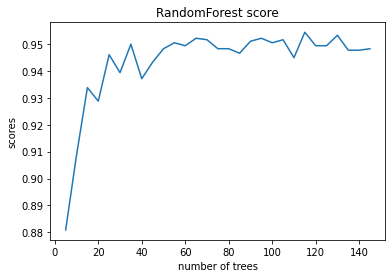

In [ ]:
plt.plot(number_of_estimators, scores_estimators)
plt.xlabel('number of trees')
plt.ylabel('scores')
plt.title('RandomForest score')

Зависимость от количества признаков

In [ ]:
d = X.shape[1] # количество признаков (столбцов)
number_of_estimators = np.arange(5, d, 5) 
scores_features = [] # средние оценки моделей, на каждом количестве признаков (столбцов)
for n in number_of_estimators:
    clf = ensemble.RandomForestClassifier(n_estimators = 100, max_features = n)
    scores_features.append(model_selection.cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

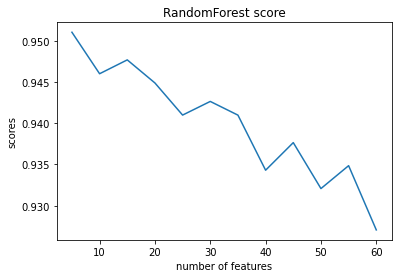

In [ ]:
plt.plot(number_of_estimators, scores_features)
plt.xlabel('number of features')
plt.ylabel('scores')
plt.title('RandomForest score')

Зависимость от глубины дерева

In [ ]:
depth = np.arange(1, 50, 1) # глубина деревьев
scores_depth = [] # средние оценки моделей, на каждой глубине дерева
for n in depth:
    clf = ensemble.RandomForestClassifier(n_estimators = 100, max_features = number_of_features, max_depth = n)
    scores_depth.append(model_selection.cross_val_score(clf, X, y, cv = 10).mean())

Text(0.5, 1.0, 'RandomForest score')

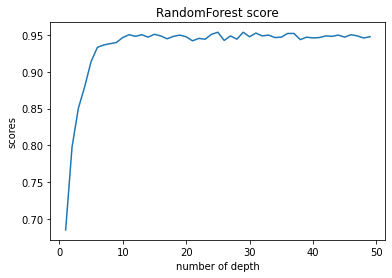

In [ ]:
plt.plot(depth, scores_depth)
plt.xlabel('number of depth')
plt.ylabel('scores')
plt.title('RandomForest score')

Верные утверждения: 2, 3, 4, 7

1.

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

2.

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

3.

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на \sqrt{d} 
d
​	
  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

4.

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же \sqrt{d} 
d
​	
  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

5.

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Как отправить
Когда работа будет готова, вы можете загрузить файлы для каждой части задания на вкладке 'Мои работы'.